<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Projects/Customer_Segmentation_Using_RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Using RFM Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
color=sns.color_palette()

import time
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
rt=pd.read_csv('C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\OnlineRetail.csv', encoding= 'unicode_escape')

In [ ]:
print(rt.shape)
rt.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
rt.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [ ]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
list(rt.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [ ]:
rt.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
rt.dropna(subset=['CustomerID'],how='all',inplace=True)
rt.shape

(406829, 8)

In [ ]:
rt.isna().sum().sum()

0

In [ ]:
rt.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
for col in list(rt.columns):
    uv=np.unique(rt[col])
    nu=len(uv)
    if nu<40:
        print('no of unique values for {} column is {} and they are like {}'.format(col,nu,uv))
    else:
        print('no of unique values for {} column is {}'.format(col,nu))

no of unique values for InvoiceNo column is 22190
no of unique values for StockCode column is 3684
no of unique values for Description column is 3896
no of unique values for Quantity column is 436
no of unique values for InvoiceDate column is 20460
no of unique values for UnitPrice column is 620
no of unique values for CustomerID column is 4372
no of unique values for Country column is 37 and they are like ['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brazil' 'Canada'
 'Channel Islands' 'Cyprus' 'Czech Republic' 'Denmark' 'EIRE'
 'European Community' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'Israel' 'Italy' 'Japan' 'Lebanon' 'Lithuania' 'Malta' 'Netherlands'
 'Norway' 'Poland' 'Portugal' 'RSA' 'Saudi Arabia' 'Singapore' 'Spain'
 'Sweden' 'Switzerland' 'USA' 'United Arab Emirates' 'United Kingdom'
 'Unspecified']


In [ ]:
# country wise 
rt.groupby(['Country'])['CustomerID'].count().sort_values(ascending=False).head()

Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: CustomerID, dtype: int64

In [ ]:
# or 
rt.Country.value_counts().head()

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text major ticklabel objects>)

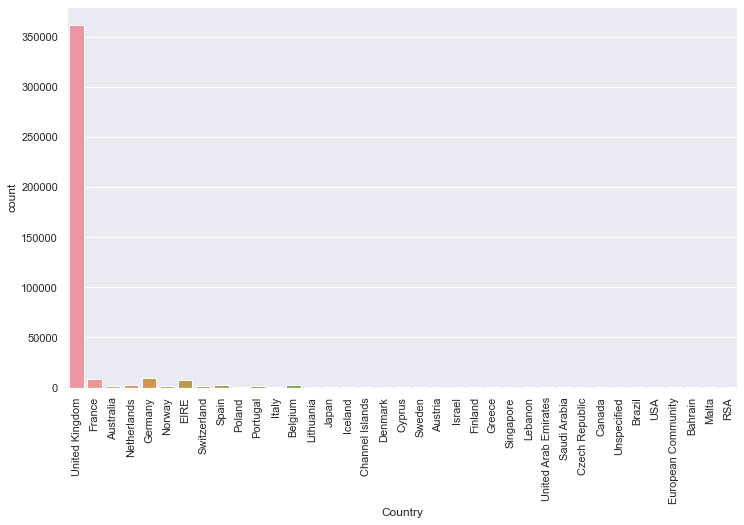

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot('Country',data=rt)
plt.xticks(rotation=90)

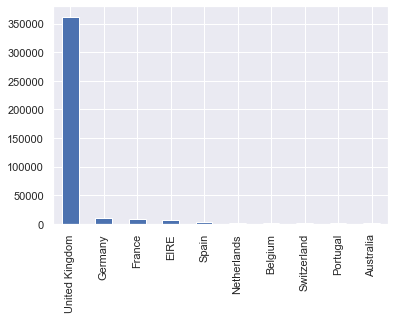

In [ ]:
rt.Country.value_counts()[:10].plot(kind='bar')

In [ ]:
# taking for only UK
rt=rt[rt['Country']=='United Kingdom']
print(rt.shape)
rt.head()

(361878, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# removing cancelled orders
rt=rt[rt['Quantity']!=0]
rt.shape

(361878, 8)

In [ ]:
print("Number of transactions: ", rt['InvoiceNo'].nunique())
print("Number of products bought: ",rt['StockCode'].nunique())
print("Number of customers:", rt['CustomerID'].nunique())

Number of transactions:  19857
Number of products bought:  3661
Number of customers: 3950


In [ ]:
rt1=rt.copy()
rt1[['Country','CustomerID']].drop_duplicates()
rt1.shape

(361878, 8)

In [ ]:
# filter required columns
rt['Date']=pd.DatetimeIndex(rt['InvoiceDate']).date
rt['Total Sales']=rt['UnitPrice']*rt['Quantity']
rt=rt[['InvoiceNo','Quantity', 'InvoiceDate','UnitPrice','CustomerID','Total Sales','Date']]
rt.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Sales,Date
0,536365,6,12/1/2010 8:26,2.55,17850.0,15.30,2010-12-01
1,536365,6,12/1/2010 8:26,3.39,17850.0,20.34,2010-12-01
2,536365,8,12/1/2010 8:26,2.75,17850.0,22.00,2010-12-01
3,536365,6,12/1/2010 8:26,3.39,17850.0,20.34,2010-12-01
4,536365,6,12/1/2010 8:26,3.39,17850.0,20.34,2010-12-01


In [ ]:
# restricting the data to one year
rt.Date.max()

datetime.date(2011, 12, 9)

In [ ]:
# taking the data for a year for analysis
print(rt.shape)
rt=rt[rt.InvoiceDate>='2010-12-9']
rt.shape

(361878, 7)


(180105, 7)

# Recency:
To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [ ]:
rt.Date.max()

datetime.date(2011, 9, 30)

In [ ]:
now=dt.date(2011,9,30)
now

datetime.date(2011, 9, 30)

In [ ]:
ry=rt.groupby('CustomerID',as_index=False)['Date'].max()
ry.columns=['CustomerID','Last_purchase_date']
ry.head()

,CustomerID,Last_purchase_date
0,12747.0,2011-08-22
1,12748.0,2011-09-30
2,12749.0,2011-08-18
3,12820.0,2011-09-26
4,12821.0,2011-05-09


In [ ]:
ry['Recency']=ry['Last_purchase_date'].apply(lambda x: (now-x).days) # no of days since last purchase
ry.head()

,CustomerID,Last_purchase_date,Recency
0,12747.0,2011-08-22,39
1,12748.0,2011-09-30,0
2,12749.0,2011-08-18,43
3,12820.0,2011-09-26,4
4,12821.0,2011-05-09,144


In [ ]:
ry.drop(columns=['Last_purchase_date'],inplace=True)
ry.head()

,CustomerID,Recency
0,12747.0,39
1,12748.0,0
2,12749.0,43
3,12820.0,4
4,12821.0,144


In [ ]:
rt[rt['CustomerID']==12747].head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Sales,Date
106282,545321,20,3/1/2011 14:53,1.95,12747.0,39.0,2011-03-01
106283,545321,10,3/1/2011 14:53,1.95,12747.0,19.5,2011-03-01
106284,545321,20,3/1/2011 14:53,1.95,12747.0,39.0,2011-03-01
106285,545321,20,3/1/2011 14:53,1.95,12747.0,39.0,2011-03-01
106286,545321,2,3/1/2011 14:53,7.95,12747.0,15.9,2011-03-01


In [ ]:
(now-dt.date(2011,1,18)).days

255

# Frequency
Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [ ]:
rt1=rt.copy()
rt1.drop_duplicates(subset=['InvoiceNo','CustomerID'],keep="first", inplace=True)

In [ ]:
freq=rt1.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
freq.columns=['CustomerID','Frequency']
freq.head()

,CustomerID,Frequency
0,12747.0,5
1,12748.0,104
2,12749.0,6
3,12820.0,1
4,12821.0,1


# Monetary
Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [ ]:
rt2=rt.copy()

In [ ]:
mt=rt2.groupby('CustomerID',as_index=False)['Total Sales'].sum()
mt.columns=['CustomerID','Monetary']
mt.head()

,CustomerID,Monetary
0,12747.0,1760.09
1,12748.0,12334.33
2,12749.0,2532.55
3,12820.0,217.77
4,12821.0,92.72


In [ ]:
rt2[rt2.CustomerID==12747].head() # verification

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Sales,Date
106282,545321,20,3/1/2011 14:53,1.95,12747.0,39.0,2011-03-01
106283,545321,10,3/1/2011 14:53,1.95,12747.0,19.5,2011-03-01
106284,545321,20,3/1/2011 14:53,1.95,12747.0,39.0,2011-03-01
106285,545321,20,3/1/2011 14:53,1.95,12747.0,39.0,2011-03-01
106286,545321,2,3/1/2011 14:53,7.95,12747.0,15.9,2011-03-01


In [ ]:
rf=ry.merge(freq, on='CustomerID')
rfm=rf.merge(mt, on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12747.0,39,5,1760.09
1,12748.0,0,104,12334.33
2,12749.0,43,6,2532.55
3,12820.0,4,1,217.77
4,12821.0,144,1,92.72


https://github.com/joaolcorreia/RFM-analysis/blob/master/RFM%20Analysis.ipynb

# Customer segmentation with RFM Analysis

To perform RFM analysis, we divide customers into four equal groups according to the distribution of values for recency, frequency, and monetary value.

Four equal groups across three variables create 64 (4x4x4) different customer segments, which is a manageable number.

Note that you can use quintiles (five equal groups) for increased granularity, but managing and acting on 125 segments (5x5x5) is significantly more challenging.

For example, let’s look at a customer who:

* is within the group who purchased most recently (R=1),
* is within the group who purchased most quantity (F=1),
* is within the group who spent the most (M=1)

This customer belongs to RFM segment 1-1-1 (Best Customers), (R=1, F=1, M=1)

In [ ]:
quantiles=rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14149.75,14.0,1.0,244.8000
0.50,15519.50,46.0,2.0,499.3600
0.75,16872.75,112.0,4.0,1138.9175


In [ ]:
quantiles.to_dict()

{'CustomerID': {0.25: 14149.75, 0.5: 15519.5, 0.75: 16872.75},
 'Recency': {0.25: 14.0, 0.5: 46.0, 0.75: 112.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'Monetary': {0.25: 244.8, 0.5: 499.3600000000001, 0.75: 1138.9175}}

**Computing Quantile of RFM values**

Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
rfm_seg=rfm.copy()
rfm_seg['R score']=rfm_seg['Recency'].apply(RScore,args=('Recency',quantiles,))
rfm_seg['F score']=rfm_seg['Frequency'].apply(FMScore,args=('Frequency',quantiles,))
rfm_seg['M score']=rfm_seg['Monetary'].apply(FMScore,args=('Monetary',quantiles,))
rfm_seg

,CustomerID,Recency,Frequency,Monetary,R score,F score,M score
0,12747.0,39,5,1760.09,2,1,1
1,12748.0,0,104,12334.33,1,1,1
2,12749.0,43,6,2532.55,2,1,1
3,12820.0,4,1,217.77,1,4,4
4,12821.0,144,1,92.72,4,4,4
...,...,...,...,...,...,...,...
2885,18280.0,207,1,180.60,4,4,4
2886,18281.0,110,1,80.82,3,4,4
2887,18282.0,52,2,98.76,3,3,4
2888,18283.0,25,7,802.77,2,1,2


In [ ]:
rfm_seg['RFM score']=rfm_seg['R score'].astype(str)+rfm_seg['F score'].astype(str)+rfm_seg['M score'].astype(str)
rfm_seg

,CustomerID,Recency,Frequency,Monetary,R score,F score,M score,RFM score
0,12747.0,39,5,1760.09,2,1,1,211
1,12748.0,0,104,12334.33,1,1,1,111
2,12749.0,43,6,2532.55,2,1,1,211
3,12820.0,4,1,217.77,1,4,4,144
4,12821.0,144,1,92.72,4,4,4,444
...,...,...,...,...,...,...,...,...
2885,18280.0,207,1,180.60,4,4,4,444
2886,18281.0,110,1,80.82,3,4,4,344
2887,18282.0,52,2,98.76,3,3,4,334
2888,18283.0,25,7,802.77,2,1,2,212


In [ ]:
# Filter out Top/Best cusotmers
rfm_seg[rfm_seg['RFM score']=='111'].sort_values(by='Monetary', ascending=False)

,CustomerID,Recency,Frequency,Monetary,R score,F score,M score,RFM score
2786,18102.0,2,36,138570.51,1,1,1,111
2456,17450.0,0,35,134629.40,1,1,1,111
2483,17511.0,3,25,45851.93,1,1,1,111
2718,17949.0,0,37,45305.82,1,1,1,111
478,13694.0,1,39,38589.38,1,1,1,111
...,...,...,...,...,...,...,...,...
2417,17377.0,4,6,1202.44,1,1,1,111
1017,14696.0,1,5,1183.43,1,1,1,111
1612,15827.0,3,13,1167.96,1,1,1,111
1756,16115.0,2,5,1154.19,1,1,1,111


In [ ]:
print("Best Customers: ",len(rfm_seg[rfm_seg['RFM score']=='111']))
print('Loyal Customers: ',len(rfm_seg[rfm_seg['F score']==1]))
print("Big Spenders: ",len(rfm_seg[rfm_seg['M score']==1]))
print("Most Recent Customers",len(rfm_seg[rfm_seg['R score']==1]))
print('Almost Lost Customers: ',len(rfm_seg[rfm_seg['RFM score']=='311']))
print('Lost Customers: ',len(rfm_seg[rfm_seg['RFM score']=='411']))
print('Lost Cheap Customers: ',len(rfm_seg[rfm_seg['RFM score']=='444']))

Best Customers:  246
Loyal Customers:  622
Big Spenders:  723
Most Recent Customers 732
Almost Lost Customers:  49
Lost Customers:  3
Lost Cheap Customers:  295


**Segment	RFM	Description	Marketing**

* Best Customers	111	Customers who bought most recently, most often and spend the most.	No price incentives, New products and loyalty programs
* Loyal Customers	X1X	Customers who bought most recently	Use R and M to further segment.
* Big Spenders	XX1	Customers who spend the most	Market your most expensive products.
* Almost Lost	311	Haven't purchased for some time, but purchased frequently and spend the most.	Agressive price incentives
* Lost Customers	411	Haven't purchased for some time, but purchased frequently and spend the most.	Agressive price incentives.
* Lost Cheap Customers	444	Last purchase long ago, purchased few and spend little.	Don't spend too much trying to re-acquire.